In [104]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import nanmean
from scipy.stats import nanstd

In [105]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\Analysis\\Odor_Panel\\Odor_Trials.csv'
trials=pd.read_csv(filename)

# Figure 1: Graph individual traces

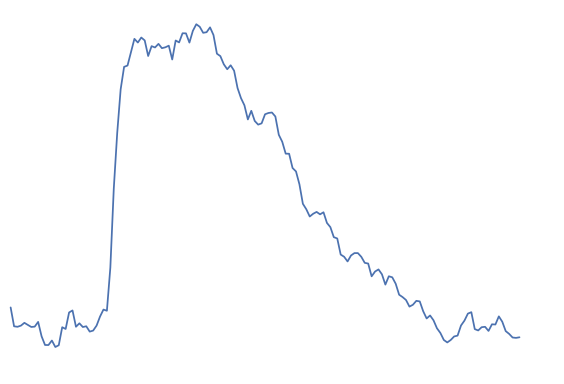

In [103]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\160328_1\\55dt.txt'
comp=pd.read_csv(filename,index_col=0)
ncomp=pd.DataFrame(comp[1:150]['G PMT (6)'])
sns.set(style="white")
f,ax=plt.subplots()
ax.plot(ncomp)
sns.despine(left=True,bottom=True)
plt.ylim(-0.15, 1);
ax.set_yticks([]);
ax.set_xticks([]);
plt.tight_layout();

# Figure 2: Baseline and Peak, Integral

In [117]:
x='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullbaseline_WL.csv'
baseline=pd.read_csv(x)
y='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullintegral_WL.csv'
integral=pd.read_csv(y)
z='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
peak=pd.read_csv(z)
s='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullsuccess_WI.csv'
success=pd.read_csv(s)

In [119]:
melt_base=pd.melt(baseline,('Mouse','Group'),var_name='Odor')
melt_int=pd.melt(integral,('Mouse','Group'),var_name='Odor')
melt_success=pd.melt(success,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(peak,('Mouse','Group'),var_name='Odor')

In [120]:
#THE ENTIRE DATAFRAME
completedf=pd.concat([melt_base[['Mouse','Group','Odor','value']],melt_int['value'],melt_peak['value'],melt_success['value']],axis=1)
completedf.columns=['Mouse','Group','Odor','Baseline','Integral','Peak','Success']

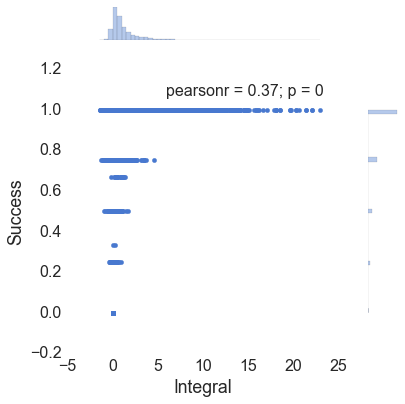

In [156]:
#GRAPH THE INTERACTIONS
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.jointplot('Integral','Success',completedf);
sns.despine(left=True,bottom=True);
plt.tight_layout();

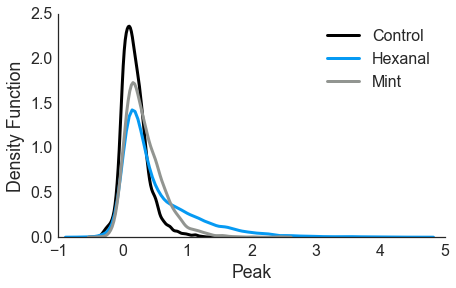

In [220]:
sns.set(style='white');
sns.set_context("paper",font_scale=2);
x=melt_peak[melt_peak.Group=='Control'].value.dropna();
y=melt_peak[melt_peak.Group=='Hexanal'].value.dropna();
z=melt_peak[melt_peak.Group=='Mint'].value.dropna();
sns.distplot(x,hist=False,color=sns.xkcd_rgb["black"],kde_kws={'lw':3,'label':'Control'});
sns.distplot(y,hist=False,color=sns.xkcd_rgb["azure"],kde_kws={'lw':3,'label':'Hexanal'});
sns.distplot(z,hist=False,color=sns.xkcd_rgb["grey"],kde_kws={'lw':3,'label':'Mint'});
sns.despine();
plt.tight_layout();
plt.xlabel('Peak');
plt.ylabel('Density Function');


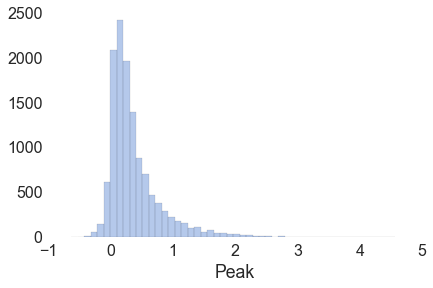

In [155]:
x=completedf.Peak.dropna()
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.distplot(x,kde=False);
sns.despine(left=True,bottom=True);
plt.tight_layout();


# Figure 3: Habituation

In [175]:
h='C:\Users\Annie\Documents\Data\Ca_Imaging\HabituationFiles\NormalizedHabituation.csv'
habituation=pd.read_csv(h)

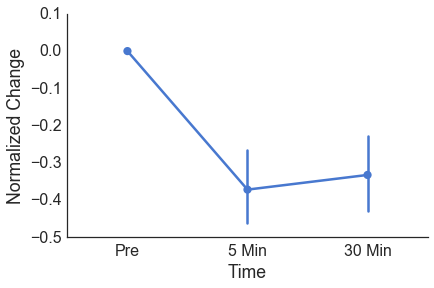

In [176]:
h=pd.melt(habituation,var_name='Time',value_name='Normalized Change');
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.pointplot(x='Time',y='Normalized Change',data=h);
plt.ylabel('Normalized Change')
sns.despine();
plt.tight_layout();

# Prep Peaks Dataframe

In [221]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)
cfull=pd.melt(composite_full,['Group','Mouse'],var_name="Odor")

In [222]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

In [223]:
#Make separate excitatory and inhibitory dataframes
mindf=pd.DataFrame([])
maxdf=pd.DataFrame([])
zdf=pd.DataFrame([])
for x in cfull.index:
    if cfull.value[x]>0:
        a=pd.DataFrame(cfull.iloc[x]).T
        maxdf=maxdf.append(a,ignore_index=True)
    elif cfull.value[x]<0:
        a=pd.DataFrame(cfull.iloc[x]).T
        mindf=mindf.append(a,ignore_index=True)
    else:
        a=pd.DataFrame(cfull.iloc[x]).T
        zdf=zdf.append(a,ignore_index=True)

In [233]:
one_mindf=mindf[['Group','Odor','value']][mindf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_mindf=mindf[['Group','Odor','value']][mindf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_mindf=conc_mindf.sort_values(by='Odor')

one_maxdf=maxdf[['Group','Odor','value']][maxdf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_maxdf=maxdf[['Group','Odor','value']][maxdf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]

one_mindf=one_mindf.replace(to_replace='MS01',value='MS')
one_mindf=one_mindf.replace(to_replace='Hexanal01',value='Hexanal')
one_mindf=one_mindf.replace(to_replace='IAA01',value='IAA')

one_maxdf=one_maxdf.replace(to_replace='MS01',value='MS')
one_maxdf=one_maxdf.replace(to_replace='Hexanal01',value='Hexanal')
one_maxdf=one_maxdf.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_maxdf.Odor=conc_maxdf.Odor.astype('category')
conc_maxdf.Odor.cat.set_categories(sorter,inplace=True)
conc_maxdf=conc_maxdf.sort_values(['Odor'])

conc_mindf.Odor=conc_mindf.Odor.astype('category')
conc_mindf.Odor.cat.set_categories(sorter,inplace=True)
conc_mindf=conc_mindf.sort_values(['Odor'])

conc_mindf=conc_mindf.replace(to_replace='MS01',value='MS 1%')
conc_mindf=conc_mindf.replace(to_replace='MS05',value='MS 5%')
conc_mindf=conc_mindf.replace(to_replace='MS10',value='MS 10%')
conc_mindf=conc_mindf.replace(to_replace='IAA01',value='IAA 1%')
conc_mindf=conc_mindf.replace(to_replace='IAA05',value='IAA 5%')
conc_mindf=conc_mindf.replace(to_replace='IAA10',value='IAA 10%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal10',value='Hexanal 10%')

conc_maxdf=conc_maxdf.replace(to_replace='MS01',value='MS 1%')
conc_maxdf=conc_maxdf.replace(to_replace='MS05',value='MS 5%')
conc_maxdf=conc_maxdf.replace(to_replace='MS10',value='MS 10%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA01',value='IAA 1%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA05',value='IAA 5%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA10',value='IAA 10%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [234]:
cat=('Control','Mint','Hexanal')

# Figure 4-5: Amplitude of excitatory responses/BOXPLOTS

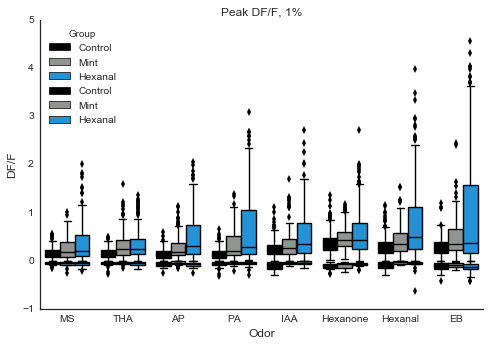

In [294]:
#1% CONCENTRATION
cat=('Control','Mint','Hexanal')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=one_maxdf);
f=sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=one_mindf);
# ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,5)
plt.tight_layout()

In [254]:
MS_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

MS_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

In [252]:
conc_maxdf

,Group,Odor,value
0,Control,MS 1%,0.015671
512,Hexanal,MS 1%,0.216320
513,Hexanal,MS 1%,0.200734
514,Hexanal,MS 1%,0.126636
515,Hexanal,MS 1%,0.146380
516,Hexanal,MS 1%,0.209309
517,Hexanal,MS 1%,0.299622
518,Hexanal,MS 1%,0.148053
519,Hexanal,MS 1%,0.086919
520,Hexanal,MS 1%,0.024138


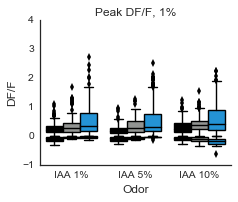

In [270]:
#Multiple Concentration
cat=('Control','Mint','Hexanal')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=IAA_conc_mindf);
ax=sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=IAA_conc_maxdf);
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,4)
plt.tight_layout()

# Figure 4-5: MEDIAN

1%

In [292]:
#MEDIANS for 1%
medians=pd.DataFrame([])
df=one_maxdf
for x in df.Group.unique():
    tmp=pd.DataFrame([])
    for y in df.Odor.unique():
        a=df[(df.Group==x)&(df.Odor==y)]['value'].dropna().median()
        m=pd.DataFrame({y:[a]})
        tmp=pd.concat([tmp,m],axis=1)
    b=pd.DataFrame({'Group':[x]})
#     c=pd.DataFrame({'Group':[df[df.Mouse==x]['Group'].iloc[0]]})
#     c=c.reset_index(drop=True)
    tmp=pd.concat([b,tmp],axis=1)
    medians=medians.append(tmp)
maxmedianmelt=pd.melt(medians,"Group",var_name="Odor")

(-0.2, 0.6)

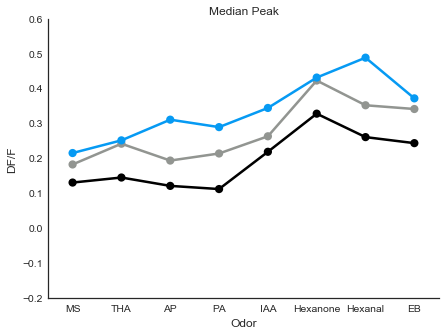

In [293]:
#Plot everything by group
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=maxmedianmelt)
# sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=minmedianmelt)
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Median Peak', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-0.2,0.6)
plt.tight_layout();

Concentrations

In [306]:
#MEDIANS
medians=pd.DataFrame([])
df=MS_conc_maxdf
# df=hex_conc_maxdf
# df=IAA_conc_maxdf
for x in df.Group.unique():
    tmp=pd.DataFrame([])
    for y in df.Odor.unique():
        a=df[(df.Group==x)&(df.Odor==y)]['value'].dropna().median()
        m=pd.DataFrame({y:[a]})
        tmp=pd.concat([tmp,m],axis=1)
    b=pd.DataFrame({'Group':[x]})
#     c=pd.DataFrame({'Group':[df[df.Mouse==x]['Group'].iloc[0]]})
#     c=c.reset_index(drop=True)
    tmp=pd.concat([b,tmp],axis=1)
    medians=medians.append(tmp)
maxmedianmelt=pd.melt(medians,"Group",var_name="Odor")

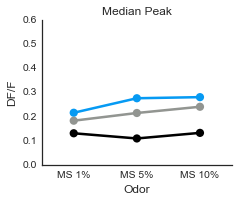

In [307]:
#Plot everything by group
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=maxmedianmelt)
# sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=minmedianmelt)
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Median Peak', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0,0.6)
plt.tight_layout();